# MTH 552 PROJECT

In [79]:
#neccesary libraries imported here

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from chefboost import Chefboost as chef
from id3 import Id3Estimator
from id3 import export_graphviz
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [80]:
dfs = pd.read_excel("IMB579XLSENG.xlsx", sheet_name=None)

In [81]:
#extracting complete data
data = dfs['Complete Data']
data.head(n=5)

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulater,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1


In [82]:
data.describe()

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
count,1239.0000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,620.0000,1.169082,0.987862,0.997819,1.127086,1.040142,1.107229,-0.032421,1.057094,0.031477
std,357.8128,1.289705,1.585856,2.559627,0.653244,0.360644,1.478032,0.142540,0.520369,0.174673
min,1.0000,0.000000,-20.811849,-32.885647,0.027685,0.068823,0.000000,-3.143505,0.000000,0.000000
25%,310.5000,0.890833,0.927076,0.771214,0.970208,0.936904,0.898767,-0.076328,0.923212,0.000000
50%,620.0000,1.022724,1.000000,1.004023,1.088962,1.001908,1.000000,-0.029245,1.013065,0.000000
75%,929.5000,1.192495,1.057962,1.216278,1.199975,1.081363,1.129950,0.022519,1.115624,0.000000
max,1239.0000,36.291185,46.466667,52.886734,13.081433,5.393872,49.301781,0.959888,13.058559,1.000000


In [83]:
print("Number of example data belonging to class 1: ", sum(data['C-MANIPULATOR']==1))
print("Number of example data belonging to class 0: ", sum(data['C-MANIPULATOR']==0))

Number of example data belonging to class 1:  39
Number of example data belonging to class 0:  1200


### CLASS IMBALANCE PROBLEM
> From above figures it is clear that the proportion of data between two classes is not balanced, therefore we can't use the data as it is to train the model because the model will be biased. This problem is well known problem in data sciene and is termed as Class Imbalance problem. Here, Class Imbalance problem has been dealt with using an oversampling technique called SMOTE (Synthetic Minority Oversampling Technique) in which we are oversampling from the minority class. After the oversampling the ratio of minority to majority class is 0.66 (approx) which is much larger than inital ratio which was around 0.033 

### DATA SPLIT 
>(same for all algorithms): 70% used for training, 30% for testing

# 1.1 CART DECISION TREE

In [79]:
#################################         CART DECISION TREE MODEL         #######################################

#extracting data
data = dfs["Complete Data"]
features = ["DSRI", "GMI", "SGI", "AQI", "DEPI", "SGAI", "ACCR", "LEVI"]
label = ["C-MANIPULATOR"]

#extracting features and labels from the data
x = data[features]
y = data[label]


#handling class imbalance problem using SMOTE: SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
smote = SMOTE(0.4)
x_new, y_new = smote.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)

In [80]:
#building CART Model
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#Evaluating the model on the basis of various performance metrics: F1 score, roc_auc score, accuracy
print("Accuracy of the model is: ", metrics.accuracy_score(y_test, y_pred)*100)
print("RocAuc Score of the model is: : ", metrics.roc_auc_score(y_test, y_pred)*100)
print("F1 Score of the model is: : ", metrics.f1_score(y_test, y_pred))

Accuracy of the model is:  92.26190476190477
RocAuc Score of the model is: :  89.62609970674488
F1 Score of the model is: :  0.8505747126436781


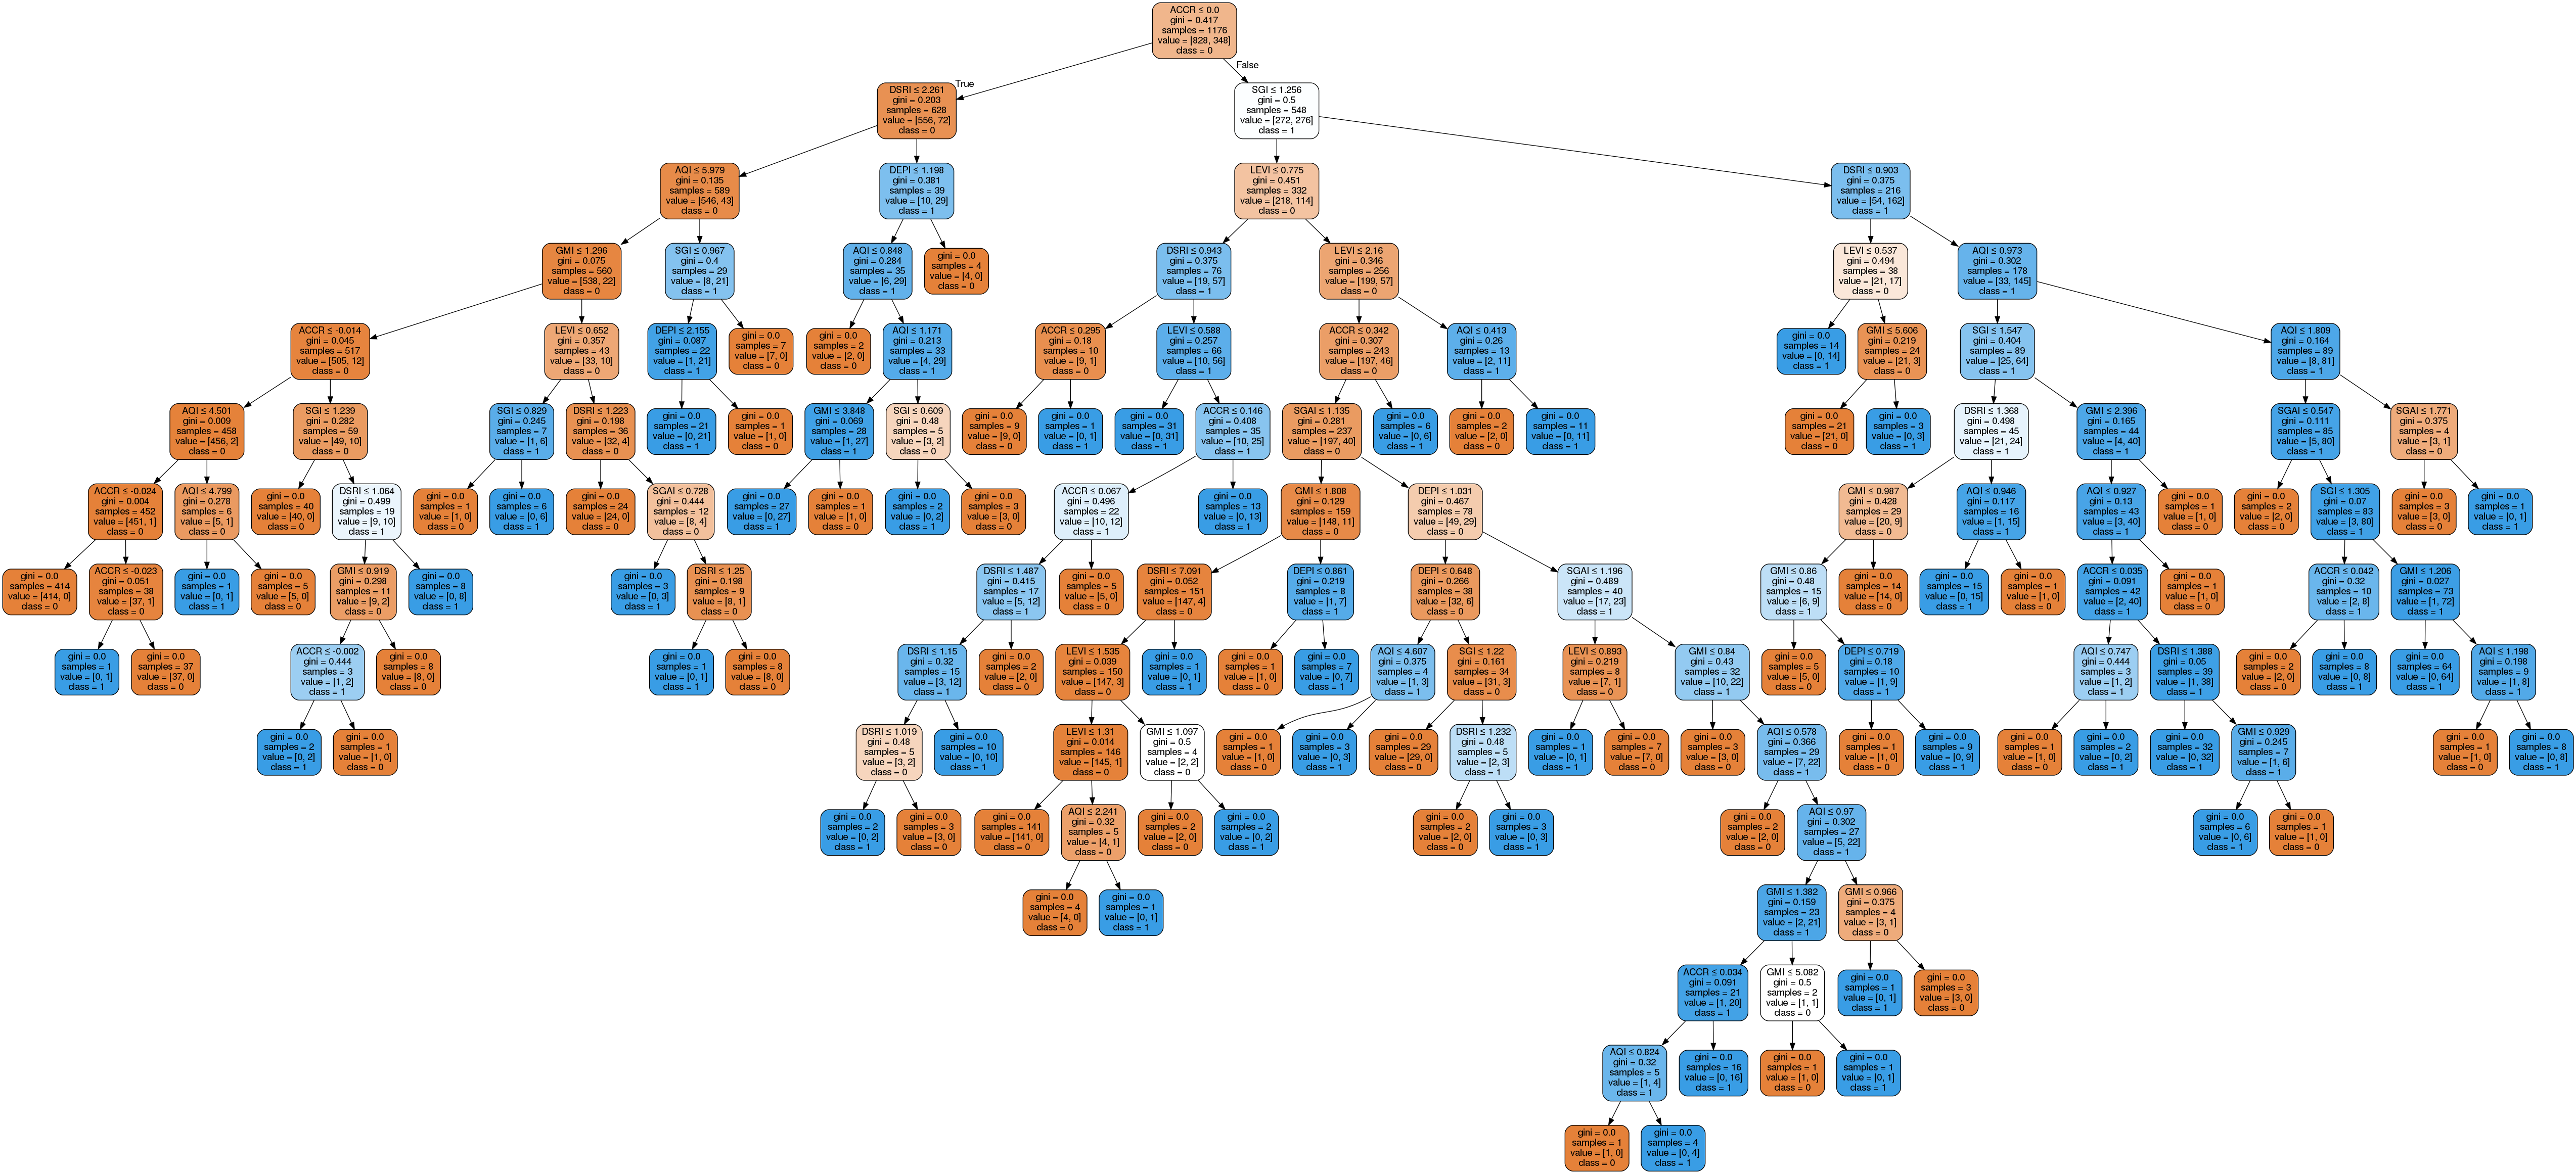

In [81]:
# CART TREE VISUALIZATION

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cart_tree.png')
Image(graph.create_png())

# 1.2 C4.5 DECISION TREE

In [84]:
##############################          C4.5 Decision Tree Model            ######################################

#extracting data
data = dfs["Complete Data"]
features = ["DSRI", "GMI", "SGI", "AQI", "DEPI", "SGAI", "ACCR", "LEVI"]
label = ["C-MANIPULATOR"]

#extracting features and labels from the data
x = data[features]
y = data[label]


#handling class imbalance problem using SMOTE: SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
smote = SMOTE(0.4)
x_new, y_new = smote.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)

#data manipulation as needed for the model
df = x_train
df['Decision'] = y_train
x_test = x_test.reset_index()
y_test = y_test.reset_index()
x_test = x_test.drop(columns="index")
y_test = y_test.drop(columns="index")
y_test = y_test.to_numpy()

In [85]:
# Building the Model
config = {'algorithm': 'C4.5'}
model = chef.fit(df, config)

Regression  tree is going to be built...
MAE:  0.12755102040816327
RMSE:  0.35595039018395364
Mean:  0.29591836734693877
MAE / Mean:  43.10344827586207 %
RMSE / Mean:  120.28668357940502 %
finished in  15.912643194198608  seconds


In [86]:
# Predictions from the Model for the Test Data
y_pred = [chef.predict(model, x_test.loc[i])  for i in range(y_test.shape[0])]
y_pred = np.array(y_pred)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_test = y_test.reshape(y_pred.shape)

In [89]:
print("Accuracy of the model is: ", metrics.accuracy_score(y_test, y_pred)*100)
print("RocAuc Score of the model is: ", metrics.roc_auc_score(y_test, y_pred)*100)
print("F1 Score of the model is: ", metrics.f1_score(y_test, y_pred))

Accuracy of the model is:  87.3015873015873
RocAuc Score of the model is:  82.6001955034213
F1 Score of the model is:  0.7500000000000001


# 1.3 ID3 Decision Tree

In [64]:
#################################         ID3 DECISION TREE MODEL         #######################################

#extracting data
data = dfs["Complete Data"]
features = ["DSRI", "GMI", "SGI", "AQI", "DEPI", "SGAI", "ACCR", "LEVI"]
label = ["C-MANIPULATOR"]

#extracting features and labels from the data
x = data[features]
y = data[label]


#handling class imbalance problem using SMOTE: SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
smote = SMOTE(0.4)
x_new, y_new = smote.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)
x_train.to_numpy();
x_test.to_numpy();
y_train.to_numpy();
y_test.to_numpy();

In [65]:
# Building the Model
from id3 import Id3Estimator
from id3 import export_graphviz

model = Id3Estimator()
model.fit(x_train, y_train)

# prediction on test data
y_predict = model.predict(x_test)

#Evaluating the model on the basis of various performance metrics: F1 score, roc_auc score, accuracy
print("Accuracy of Id3 decision tree model is: ", metrics.accuracy_score(y_test, y_predict)*100)
print("RocAuc Score Id3 decision tree model is: ", metrics.roc_auc_score(y_test, y_predict)*100)
print("F1 Score Id3 decision tree model is: ", metrics.f1_score(y_test, y_predict))

Accuracy of Id3 decision tree model is:  86.11111111111111
RocAuc Score Id3 decision tree model is:  83.82048905681899
F1 Score Id3 decision tree model is:  0.7852760736196319


In [16]:
export_graphviz(model.tree_, 'tree1.dot', features)

<_io.TextIOWrapper name='tree1.dot' mode='w' encoding='utf8'>

In [17]:
!dot -T png tree.dot -o id3_tree1.png 

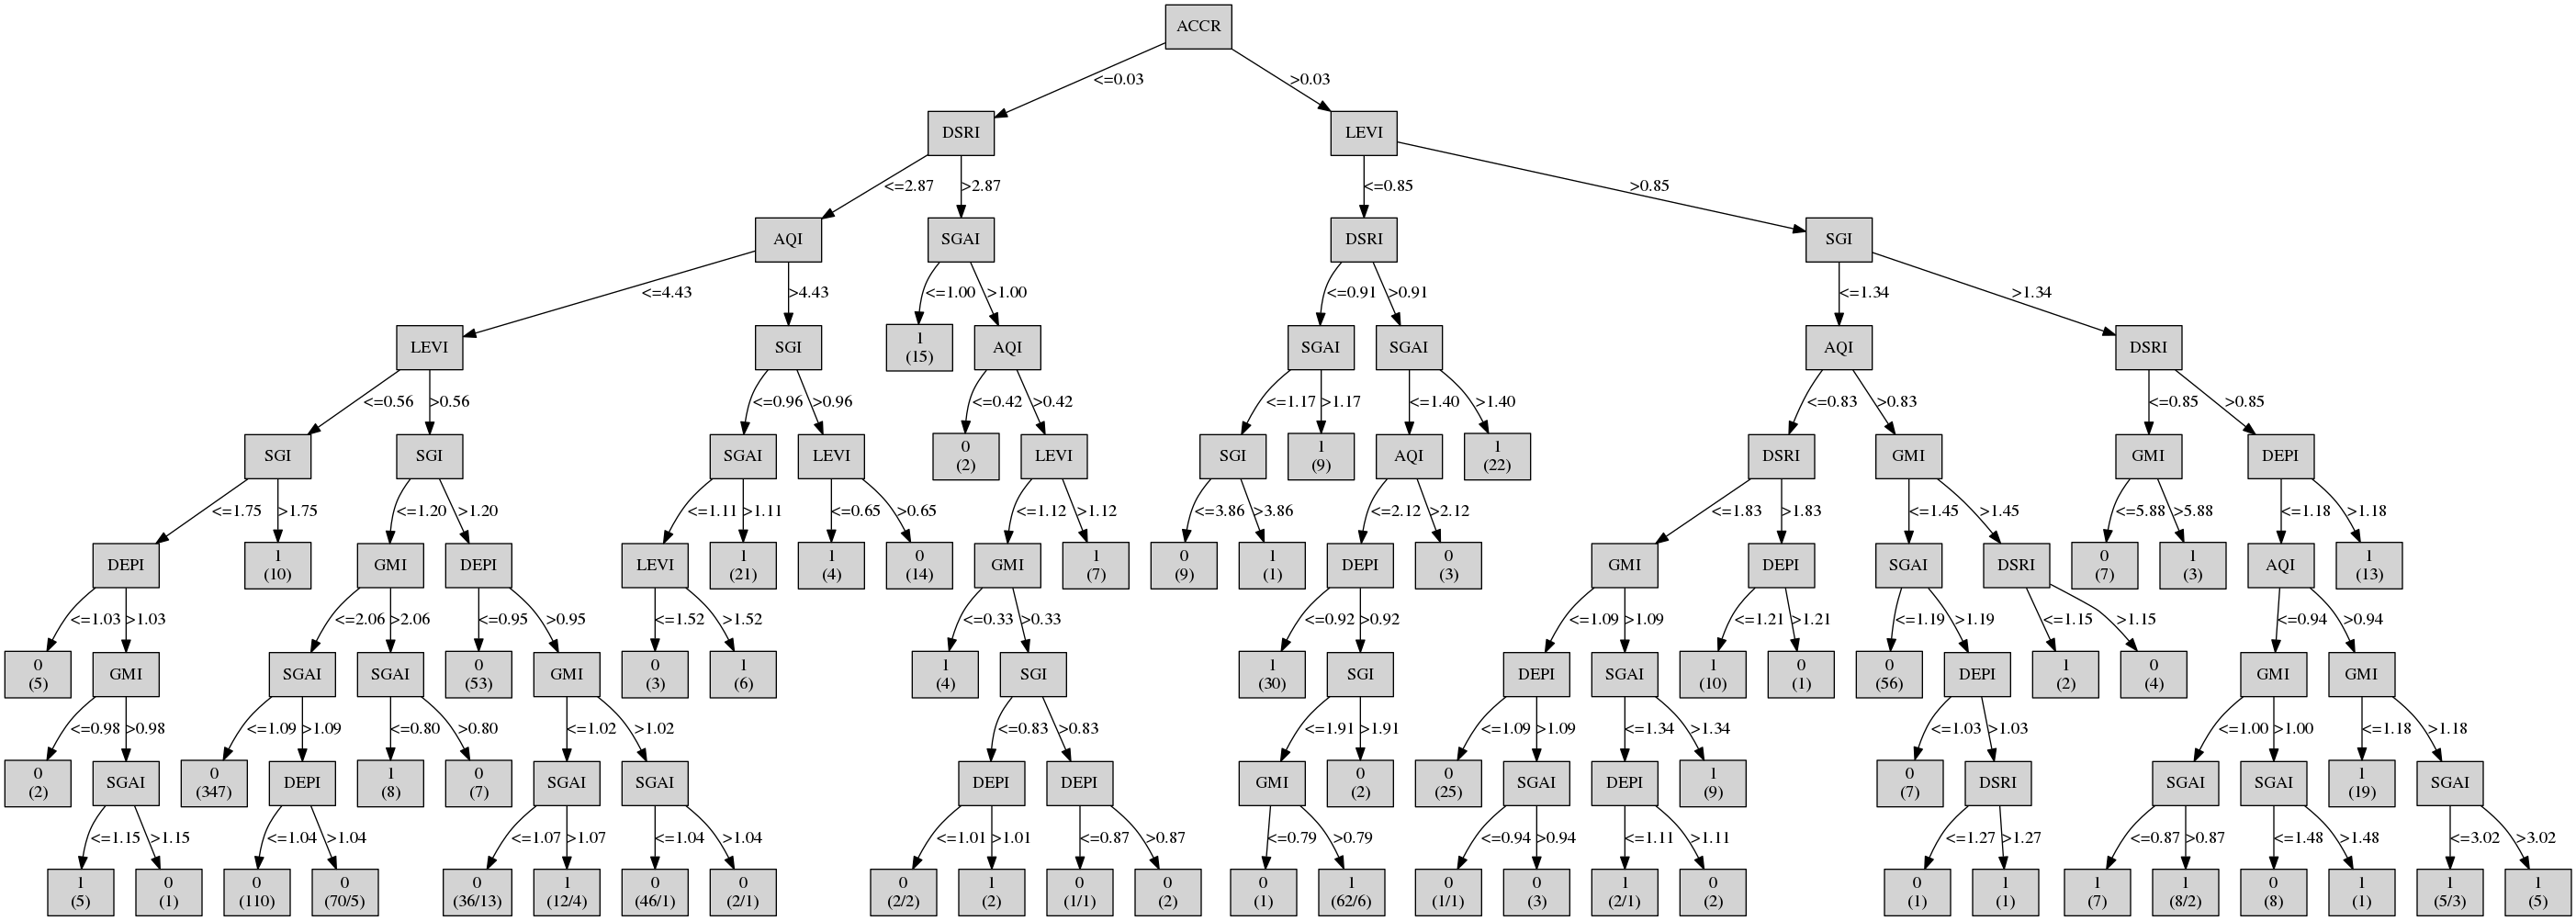

In [66]:
from IPython.display import Image

# representing the decision tree as jpg file
Image(filename="/home/kishan/academics/Courses/Sem-VI/AML/assgnment3/id3_tree.png")

# 2. Artifical Neural Network

In [100]:
#################################         ARTIFICIAL NEURAL NETWORK MODEL         #######################################


data = dfs["Complete Data"]
features = ["DSRI", "GMI", "SGI", "AQI", "DEPI", "SGAI", "ACCR", "LEVI"]
label = ["C-MANIPULATOR"]

#extracting features and labels from the data
x = data[features]
y = data[label]

x = x.to_numpy()
y = y.to_numpy()

y.shape = (y.shape[0],)

#handling class imbalance problem using SMOTE: SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
smote = SMOTE(0.4)
x_new, y_new = smote.fit_sample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3)

In [101]:
#converting pandas dataframe to tensorflow tensors
x_train_tf = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test_tf = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)


In [102]:
#Building model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1)
])
#loss function
loss_function = tf.losses.BinaryCrossentropy(from_logits=True)
#compiling model
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

#training the model
model.fit(x_train_tf, y_train_tf, epochs=150, verbose=0)

#Evaluating the model on the basis of various performance metrics: F1 score, roc_auc score, accuracy
y_predict = model.predict_classes(x_test)

print("Accuracy of ANN model is :", metrics.accuracy_score(y_test, y_predict)*100)
print("RocAuc of ANN model Score: ", metrics.roc_auc_score(y_test, y_predict)*100)
print("F1 score of the ANN model is: ", metrics.f1_score(y_test, y_predict))

Accuracy of ANN model is : 95.03968253968253
RocAuc of ANN model Score:  94.07804451162514
F1 score of the ANN model is:  0.9097472924187726


## Architecture of the Model 

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             multiple                  144       
_________________________________________________________________
dense_29 (Dense)             multiple                  544       
_________________________________________________________________
dense_30 (Dense)             multiple                  528       
_________________________________________________________________
dense_31 (Dense)             multiple                  17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
